## Phase Constrast Imaging - Using phase information to filter overlapped images

In [1]:
import numpy as np
from diffractio import mm, um, degrees
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY


# Setting up
length = 1 * mm
num_data = 512
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.633 * um

number of processors: 12


## Setting up source
- Gaussian Beam (LASER)

((<matplotlib.image.AxesImage at 0x14e0a72da60>,
  <matplotlib.image.AxesImage at 0x14e0a9cc220>),
 None,
 None)

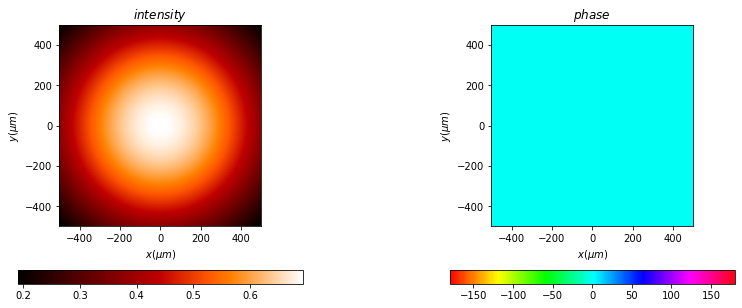

In [2]:
# Gaussian Beam Source - like a LASER
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beam(r0=(0, 0), w0=(800 * um, 800 * um), z0=0.0)
u0.draw(kind='field', logarithm=True)

In [3]:
# Plane Wave Source - Just an experiment
# u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
# u1.plane_wave()
# u1.draw(kind='field', logarithm=True)

## Image - Phase Contrast
### Composition of Horizontal and Vertical Lines

((<matplotlib.image.AxesImage at 0x14e0b1f11c0>,
  <matplotlib.image.AxesImage at 0x14e0b452940>),
 None,
 None)

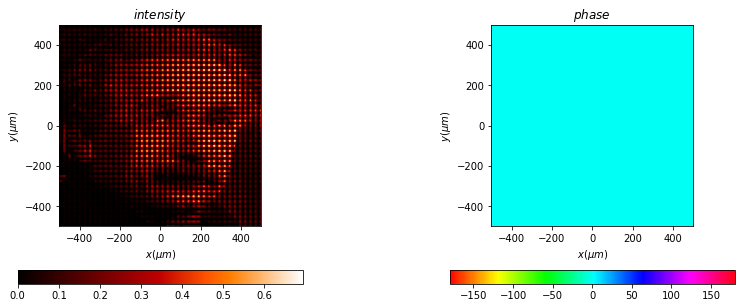

In [4]:
compLines = Scalar_mask_XY(x0, y0, wavelength)
compLines.image(
    filename="complines-4.png",
    normalize=True,
    canal=2,
)

compLines.draw(kind='field', logarithm=True)
# compLines.draw(kind='real_field', logarithm=True)
# compLines.draw(kind='amplitude', logarithm=True)

((<matplotlib.image.AxesImage at 0x14e0b06c880>,
  <matplotlib.image.AxesImage at 0x14e0b111070>),
 None,
 None)

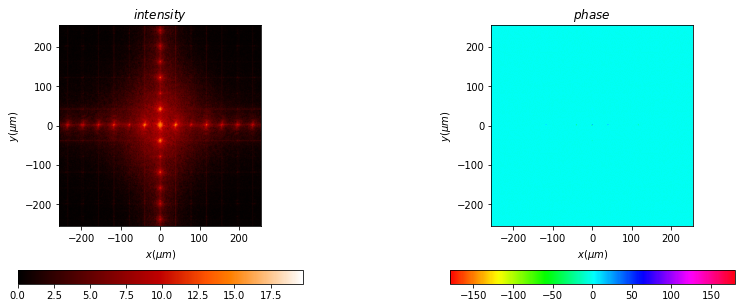

In [5]:
a_L1 = (u0 * compLines).fft(z=1 * mm, new_field=True)
a_L1.draw(kind='field', logarithm=True)
# a_L1.draw(kind='amplitude', logarithm=False)

((<matplotlib.image.AxesImage at 0x14e0b8b3c70>,
  <matplotlib.image.AxesImage at 0x14e0fd98460>),
 None,
 None)

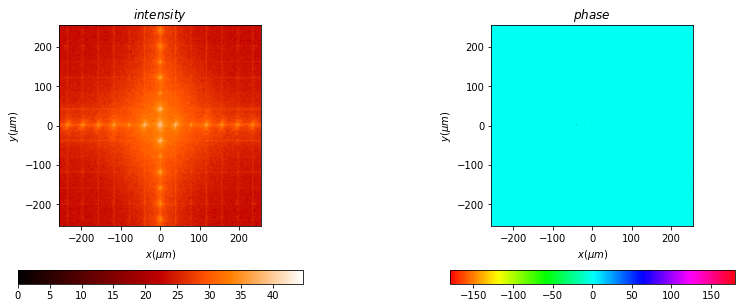

In [6]:
a_L2_NF = (a_L1.fft(z=1 * mm, shift=False, remove0=False, new_field=True)).fft(z=1 * mm, shift=False, remove0=False, new_field=True)
a_L2_NF.draw(kind='field', logarithm=True)
# a_L2_NF.draw(kind='real_field', logarithm=True)

((<matplotlib.image.AxesImage at 0x14e0fe49fd0>,
  <matplotlib.image.AxesImage at 0x14e10712790>),
 None,
 None)

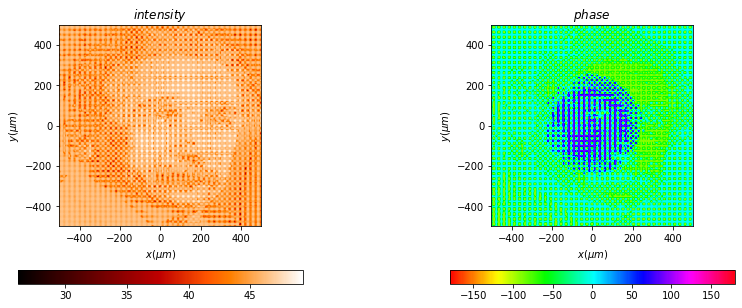

In [7]:
IFFT_NF = a_L2_NF.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
IFFT_NF.draw(kind='field', logarithm=True)

In [8]:
csize = 100  # Size of slit

((<matplotlib.image.AxesImage at 0x14e0b45e340>,
  <matplotlib.image.AxesImage at 0x14e0b0aa970>),
 None,
 None)

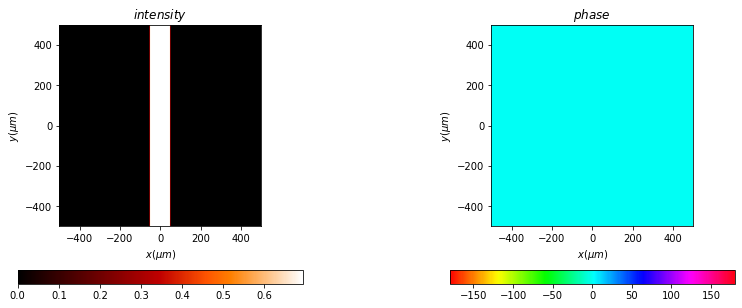

In [9]:
vertSlit = Scalar_mask_XY(x0, y0, wavelength)
vertSlit.slit(
    x0=0 * um,
    size=csize * um
)
vertSlit.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x14e112b4eb0>,
  <matplotlib.image.AxesImage at 0x14e1136b670>),
 None,
 None)

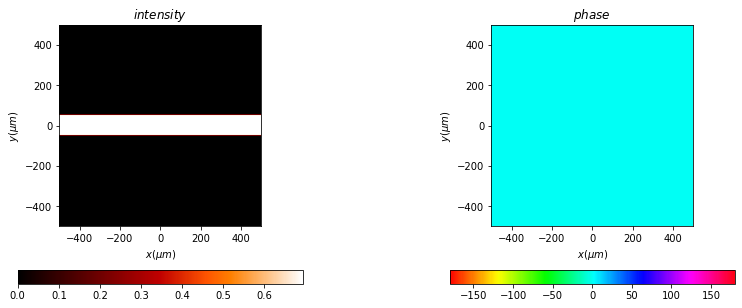

In [10]:
horizSlit = Scalar_mask_XY(x0, y0, wavelength)
horizSlit.slit(
    x0=0 * um,
    size=csize * um,
    angle=np.pi / 2
)
horizSlit.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x14e12921490>,
  <matplotlib.image.AxesImage at 0x14e12983c40>),
 None,
 None)

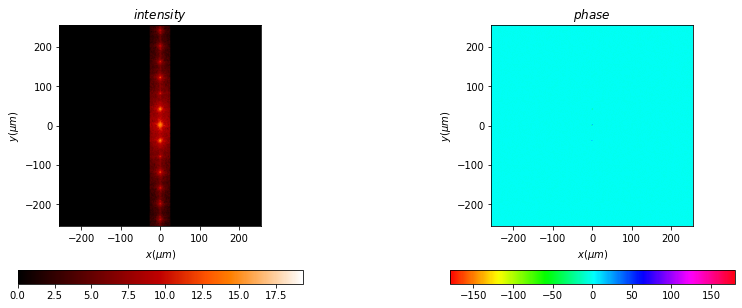

In [11]:
b_L2_a_vS = a_L1 * vertSlit
b_L2_a_vS.draw(kind='field', logarithm=True)
# b_L2_a_vS.draw(kind='amplitude', logarithm=True)

((<matplotlib.image.AxesImage at 0x14e12a45760>,
  <matplotlib.image.AxesImage at 0x14e1331b7c0>),
 None,
 None)

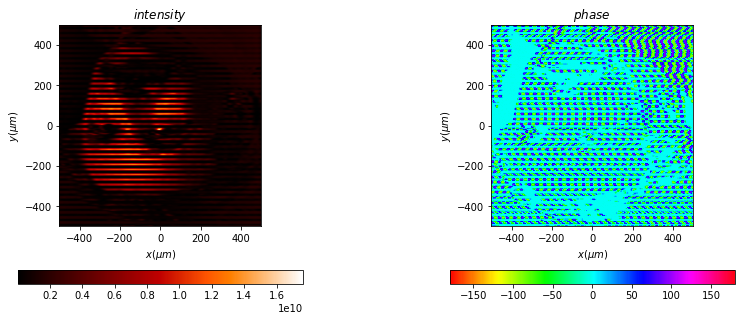

In [12]:
a_L2_vS = b_L2_a_vS.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
a_L2_vS.draw(kind='field', logarithm=False)
# a_L2_vS.draw(kind='intensity', logarithm=True)

((<matplotlib.image.AxesImage at 0x14e0b0c38e0>,
  <matplotlib.image.AxesImage at 0x14e128b60d0>),
 None,
 None)

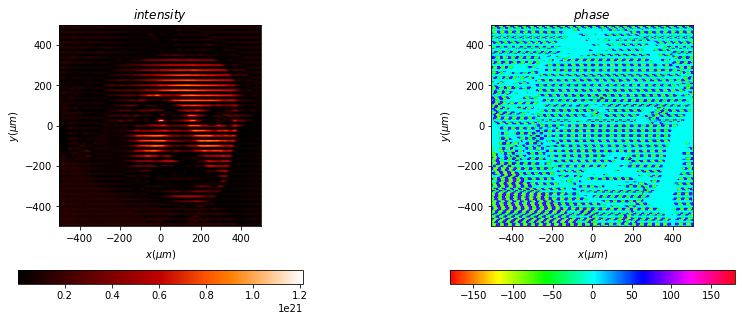

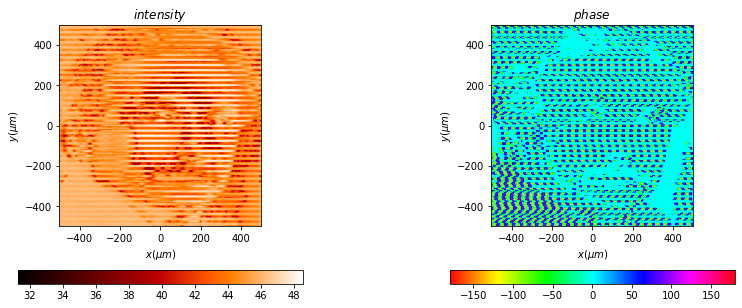

In [13]:
IFFT_vS = (a_L2_vS.fft(z=1 * mm, shift=False, remove0=False, new_field=True)).fft(z=1 * mm, shift=False, remove0=False, new_field=True)
IFFT_vS.draw(kind='field', logarithm=False)
IFFT_vS.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x14e14874a00>,
  <matplotlib.image.AxesImage at 0x14e148ff220>),
 None,
 None)

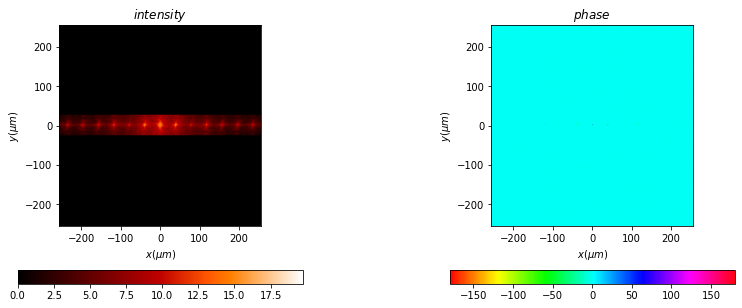

In [14]:
b_L2_a_hS = a_L1 * horizSlit
b_L2_a_hS.draw(kind='field', logarithm=True)
# b_L2_a_hS.draw(kind='amplitude', logarithm=True)

((<matplotlib.image.AxesImage at 0x14e16c12c40>,
  <matplotlib.image.AxesImage at 0x14e16c98400>),
 None,
 None)

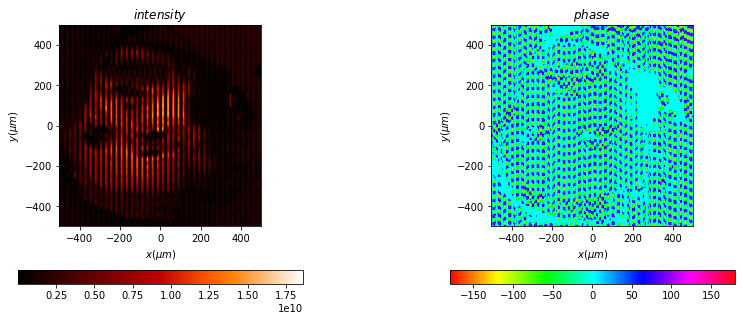

In [15]:
a_L2_hS = b_L2_a_hS.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
a_L2_hS.draw(kind='field', logarithm=False)
# a_L2_hS.draw(kind='intensity', logarithm=True)

((<matplotlib.image.AxesImage at 0x14e182461f0>,
  <matplotlib.image.AxesImage at 0x14e182b04f0>),
 None,
 None)

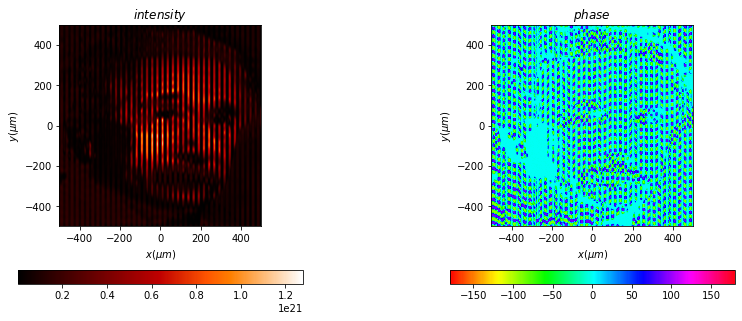

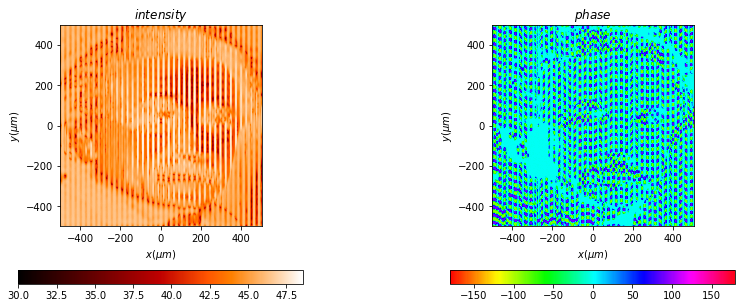

In [16]:
IFFT_hS = (a_L2_hS.fft(z=1 * mm, shift=False, remove0=False, new_field=True)).fft(z=1 * mm, shift=False, remove0=False, new_field=True)
IFFT_hS.draw(kind='field', logarithm=False)
IFFT_hS.draw(kind='field', logarithm=True)